## Set Working Directory for Relative Imports

In [2]:
import os

In [3]:
os.getcwd()

'/Users/xuxingyu/DSA4263-Voice-of-Customer-VOC-analysis/root/ipynb'

In [4]:
#os.chdir(path='/Users/nnerella/Documents/GitHub/DSA4263-Voice-of-Customer-VOC-analysis') 
os.chdir(path='/Users/xuxingyu/DSA4263-Voice-of-Customer-VOC-analysis') 
os.getcwd()

'/Users/xuxingyu/DSA4263-Voice-of-Customer-VOC-analysis'

## Import Packages

In [7]:
# User-defined packages
from root.src.preprocessing import *
from root.src.model.sa import *

In [10]:
# For reading reviews.csv
import pandas as pd

## Read Raw Data 'reviews.csv'

In [11]:
reviews_csv = pd.read_csv('root/data/raw/reviews.csv')
reviews_csv.head()

,Sentiment,Time,Text
0,positive,18/6/21,This is a very healthy dog food. Good for thei...
1,positive,7/7/21,I've been very pleased with the Natural Balanc...
2,positive,18/6/21,"Before I was educated about feline nutrition, ..."
3,positive,7/7/21,"My holistic vet recommended this, along with a..."
4,positive,1/7/21,I bought this coffee because its much cheaper ...


In [12]:
reviews_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5444 entries, 0 to 5443
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentiment  5444 non-null   object
 1   Time       5444 non-null   object
 2   Text       5444 non-null   object
dtypes: object(3)
memory usage: 127.7+ KB


The data is of reviews from cutsomers from 2017-07-12 to 2021-12-10, a period of about 4 years 5 months.

positive    4030
negative    1414
Name: Sentiment, dtype: int64


<AxesSubplot:>

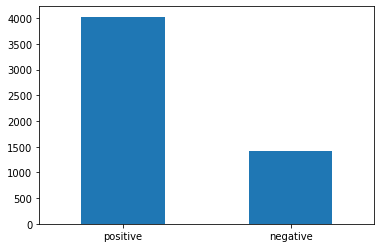

In [13]:
print(reviews_csv['Sentiment'].value_counts())
reviews_csv['Sentiment'].value_counts().plot(kind='bar', rot = 0)

#### The data is **imablanced**, there are way more positive reviews than negative reviews 

## Train - Test Split

In [17]:
# Split the Processed data for training and testing
train_data, test_data = sa_train_test_split(reviews_csv)

NameError: name 'sa_train_test_split' is not defined

Class Distribution Table

|             |    Train    |     Test    |
| ----------- | ----------- | ----------- |
|  Positive   |    2820     |     1210    |
|  Negative   |    990      |     424     |
|    Total    |    3810     |     1634    |

#### In order to handle the class imbalance, we use **nlp-aug** to create an additional augmeneted review for each negative review by replacing words in the negative review with its synonyms. Hence, in the output of SA_PREPROCESS_TRAIN() function, **the no. of negative training examples are doubled**.

## Preprocess data into Embeddings 
### Methodology: concating Word2Vec, TF-IDF and applying PCA

In [12]:
# Train data for model training
features_df_train = SA_PREPROCESS_TRAIN(train_data)
features_df_train.head()

Shape after augmenting negative training samples:  (4800, 3)


,PC_tfidf1,PC_tfidf2,PC_tfidf3,PC_tfidf4,PC_tfidf5,PC_tfidf6,PC_tfidf7,PC_tfidf8,PC_tfidf9,PC_tfidf10,...,PC_tfidf2664,PC_tfidf2665,PC_tfidf2666,PC_emb1,PC_emb2,PC_emb3,PC_emb4,PC_emb5,PC_emb6,Sentiment
0,-0.044818,0.009040,0.087206,-0.037724,-0.020343,0.044533,-0.031104,-0.022070,0.001397,-0.023037,...,0.002895,-0.004407,0.001289,-0.393426,0.152605,0.258620,-0.183940,0.000512,0.214356,1
1,-0.048218,0.000234,-0.003204,-0.000137,0.003897,-0.043223,-0.087018,0.028807,0.035660,0.095285,...,-0.000882,0.005684,0.000607,-0.295991,0.862983,0.410274,-0.256410,-0.477769,0.033977,1
2,-0.048644,-0.048189,-0.006423,-0.066066,-0.015590,-0.013951,-0.046791,-0.027284,0.043427,-0.006580,...,0.003822,-0.005287,0.012796,1.056704,0.634133,0.845054,1.319301,0.240440,0.105739,0
3,-0.041676,-0.039506,-0.001371,-0.062980,-0.034218,-0.000058,-0.053888,-0.004250,0.050986,-0.002004,...,-0.012298,-0.012946,-0.008642,-0.278642,0.899031,0.566785,-0.121847,0.039255,-0.167987,0
4,-0.050047,-0.068766,-0.009092,-0.079530,0.024280,-0.063611,-0.079887,0.016450,0.003498,-0.050411,...,-0.003948,-0.002519,0.003679,-0.481592,-0.516344,0.680220,-0.065060,-0.048079,-0.022021,0


In [13]:
# Train Data for pre-trained models
flair_train = PREPROCESS_FLAIR(train_data)
flair_train.head()

,Sentiment,Time,Text
3838,1,15/4/21,I ordered these to make sachets for baby showe...
3553,1,13/6/20,Nice flavor-not overly ginger-hot. Quick ship ...
4730,0,24/10/21,I went to check out and found out that the fre...
4802,0,17/4/21,I purchased 6 boxes as gifts at $21 per box. ...
4537,0,25/8/21,I opened this product to find that the lollipo...


Class Distribution Table

|             |    Train Before    |     Train after Pre-process    |
| ----------- | ----------- | ----------- |
|  Positive   |    2820     |     2820    |
|  Negative   |    990      |     1980    |
|    Total    |    3810     |     4800    |

In [14]:
# Test Data
features_df_test, flair_test = SA_PREPROCESS_TEST(test_data)
features_df_test.head()

,PC_tfidf1,PC_tfidf2,PC_tfidf3,PC_tfidf4,PC_tfidf5,PC_tfidf6,PC_tfidf7,PC_tfidf8,PC_tfidf9,PC_tfidf10,...,PC_tfidf2664,PC_tfidf2665,PC_tfidf2666,PC_emb1,PC_emb2,PC_emb3,PC_emb4,PC_emb5,PC_emb6,Sentiment
0,0.009392,-0.001030,0.025862,0.089727,-0.118493,-0.104282,0.036970,-0.087358,0.148801,0.028446,...,-0.015185,0.002181,-0.007437,-0.631522,0.530959,-0.059629,-0.098318,0.057684,0.152354,1
1,-0.040228,0.020083,0.038282,0.091072,-0.018080,-0.048199,0.035149,-0.015175,-0.012409,0.131539,...,-0.000503,0.007863,-0.009261,-1.069544,-0.107316,-0.862607,-0.097574,-0.197925,0.193136,1
2,-0.056960,-0.028402,0.000151,0.068146,0.102733,0.015989,0.013255,-0.034866,0.031454,-0.051450,...,0.002153,-0.008343,0.005578,-0.906589,-0.585438,-0.197346,0.272707,-0.143913,0.229611,1
3,-0.048401,-0.050857,-0.016151,-0.091316,0.024649,-0.046187,-0.068599,-0.023487,0.025618,-0.016030,...,-0.005314,-0.000702,-0.001120,-0.075894,0.791620,0.790769,0.099811,-0.190693,0.147390,0
4,0.020266,0.036870,0.052192,0.213291,-0.152914,-0.140457,0.065814,-0.146735,0.147553,-0.015514,...,0.009095,0.004762,0.014783,-0.748175,0.225025,-0.635333,-0.082876,0.133746,0.194855,0


In [15]:
flair_test.head()


,Sentiment,Time,Text
67,1,17/4/21,I am a die hard soda pop fan. I will drink jui...
2440,1,9/12/20,As i have stated before i love cheery flavor s...
3581,1,8/9/20,These are very good. Nice and soft. Would for ...
4385,0,10/7/21,this item is over priced. I but the 12oz pack...
4985,0,20/11/19,"Although some may like this drink, it will not..."


In [28]:
# Save features test and train
features_df_train.to_csv('features_df_train')
features_df_test.to_csv('features_df_test')

In [12]:
# Read features test and train
features_df_train= pd.read_csv('features_df_train',  index_col = [0])
features_df_test= pd.read_csv('features_df_test',  index_col = [0])

## Baseline : Naive Baye's Classifier

CROSS VALIDATION RESULTS
Average Cross Validation score accuracy :0.7147916666666667
Average Cross Validation score F1 :0.7345407991233486
Average Cross Validation score F1_weighted :0.7158578291203515
Average Cross Validation score pr_auc :0.8081388198420006
TEST RESULTS
Classification Report
              precision    recall  f1-score   support

           0       0.23      0.39      0.29       424
           1       0.72      0.55      0.62      1210

    accuracy                           0.51      1634
   macro avg       0.48      0.47      0.46      1634
weighted avg       0.59      0.51      0.54      1634

PR_AUC score:  0.7186188063523932


<Figure size 640x480 with 0 Axes>

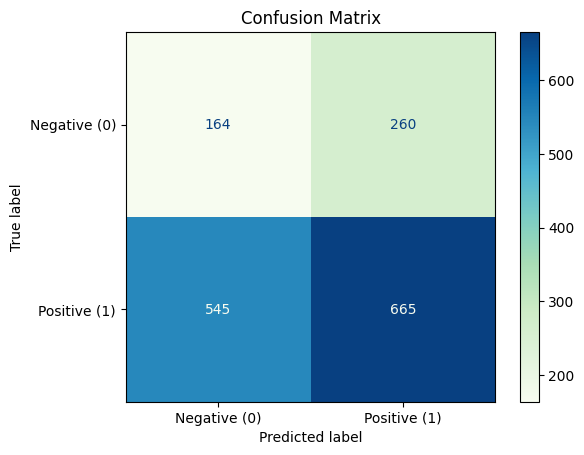

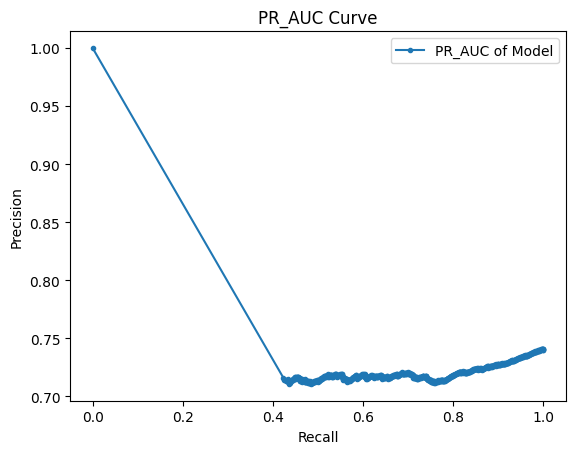

In [17]:
bayes_classifier(features_df_train,features_df_test)

## Logistic Regression

CROSS VALIDATION RESULTS
Average Cross Validation score accuracy :0.8787499999999999
Average Cross Validation score F1 :0.8993383718170292
Average Cross Validation score F1_weighted :0.8775086547375691
Average Cross Validation score pr_auc :0.9644695116324794
TEST RESULTS
Classification Report
              precision    recall  f1-score   support

           0       0.77      0.70      0.73       424
           1       0.90      0.92      0.91      1210

    accuracy                           0.87      1634
   macro avg       0.83      0.81      0.82      1634
weighted avg       0.86      0.87      0.86      1634

PR_AUC score:  0.9623837523551457


<Figure size 640x480 with 0 Axes>

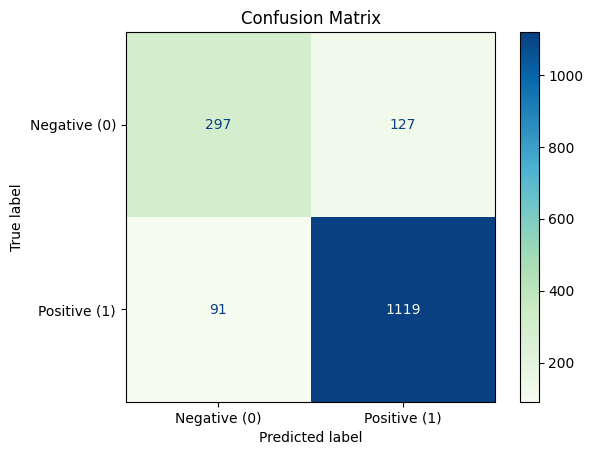

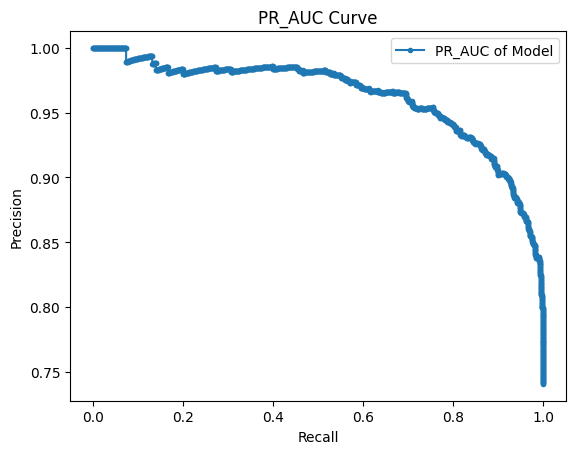

In [18]:
logistic_regression(features_df_train,features_df_test)

## Non-Linear SVM

CROSS VALIDATION RESULTS
Average Cross Validation score accuracy :0.8941666666666667
Average Cross Validation score F1 :0.9108054697612893
Average Cross Validation score F1_weighted :0.8936724290088589
Average Cross Validation score pr_auc :0.9720446514003734
TEST RESULTS
Classification Report
              precision    recall  f1-score   support

           0       0.77      0.71      0.74       424
           1       0.90      0.93      0.91      1210

    accuracy                           0.87      1634
   macro avg       0.84      0.82      0.83      1634
weighted avg       0.87      0.87      0.87      1634

PR_AUC score:  0.9667491205373238


<Figure size 640x480 with 0 Axes>

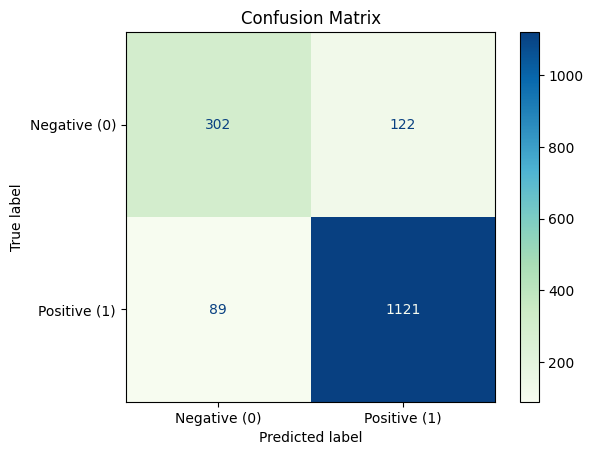

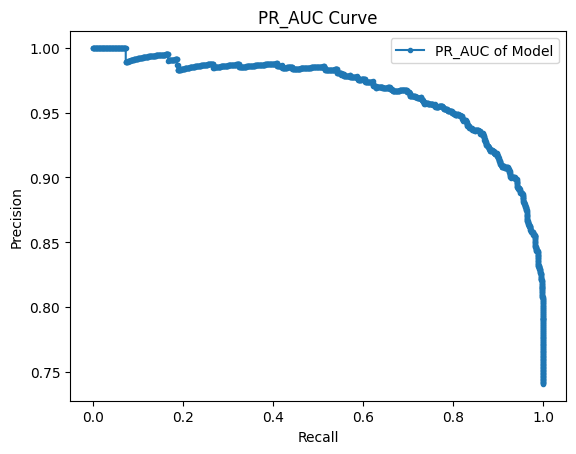

In [19]:
svc_model(features_df_train,features_df_test)

## XGBoost

CROSS VALIDATION RESULTS XGBoost
Average Cross Validation score accuracy:  0.89875
Average Cross Validation score F1:  0.915338324291907
Average Cross Validation score F1_weighted:  0.8982904513396781
Average Cross Validation score pr_auc:  0.9658645522613016
TEST RESULTS
Classification Report
              precision    recall  f1-score   support

           0       0.69      0.49      0.57       424
           1       0.84      0.92      0.88      1210

    accuracy                           0.81      1634
   macro avg       0.76      0.70      0.72      1634
weighted avg       0.80      0.81      0.80      1634

PR_AUC score:  0.9382047787440697


<Figure size 640x480 with 0 Axes>

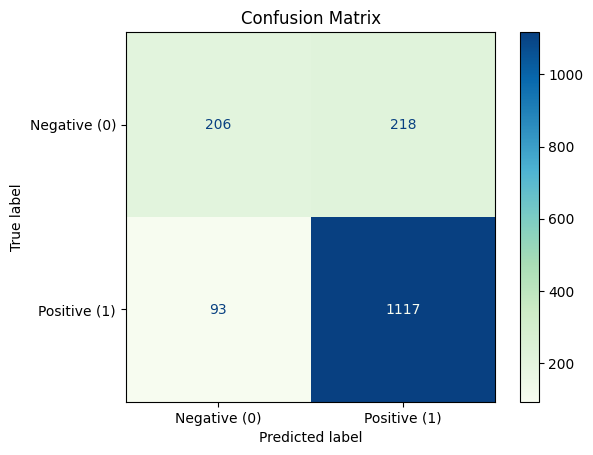

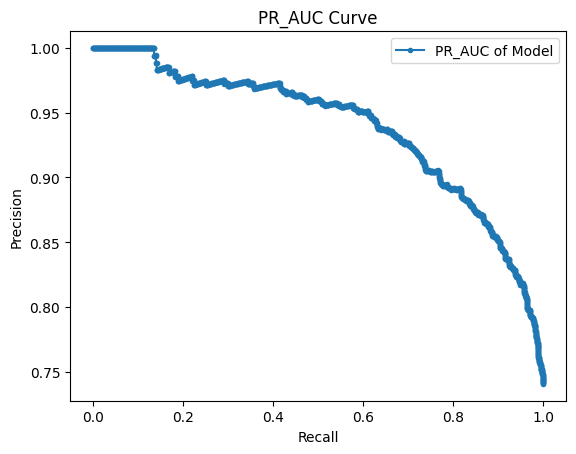

In [20]:
train_XGB(features_df_train, features_df_test)

## Vader (Valence Aware Dictionary for Sentiment Reasoning) - Pretrained Model

##### VADER is an NLTK module that provides sentiment scores based on the words used. It is a rule-based sentiment analyzer in which the terms are generally labeled as per their semantic orientation as either positive or negative.

TRAIN DATA RESULTS
Train accuracy :0.8191601049868766
Train F1 :0.8861345232193026
Train F1_weighted :0.8016161369221685
Train pr_auc :0.928612161702605
TEST RESULTS
Classification Report
              precision    recall  f1-score   support

           0       0.75      0.45      0.56       424
           1       0.83      0.95      0.88      1210

    accuracy                           0.82      1634
   macro avg       0.79      0.70      0.72      1634
weighted avg       0.81      0.82      0.80      1634

PR_AUC score:  0.9372008776712862


<Figure size 640x480 with 0 Axes>

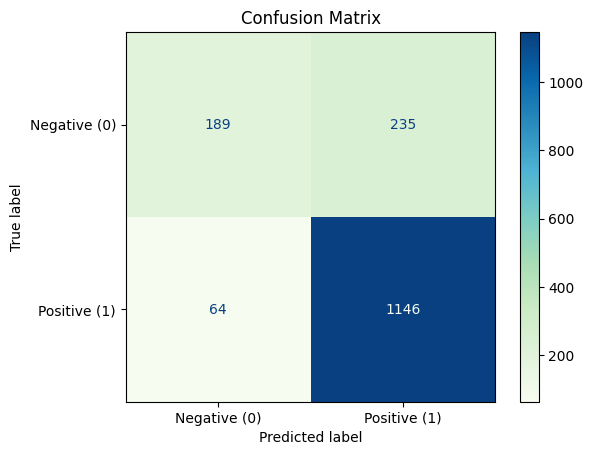

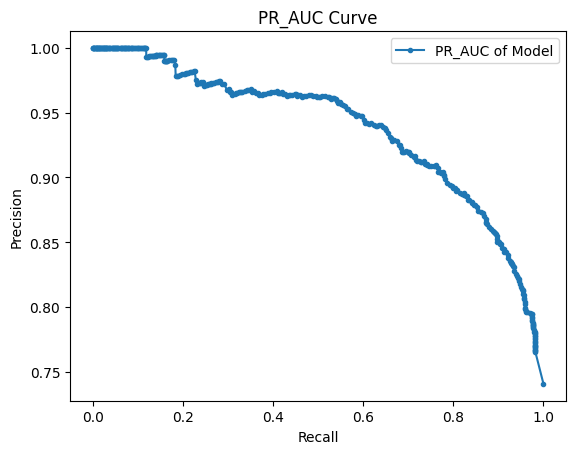

In [21]:
vader(flair_train, flair_test)

## Flair - Pretrained Model

TEST RESULTS
Classification Report
              precision    recall  f1-score   support

           0       0.83      0.97      0.89       990
           1       0.99      0.93      0.96      2820

    accuracy                           0.94      3810
   macro avg       0.91      0.95      0.93      3810
weighted avg       0.95      0.94      0.94      3810

PR_AUC score:  0.9945621450956299


<Figure size 640x480 with 0 Axes>

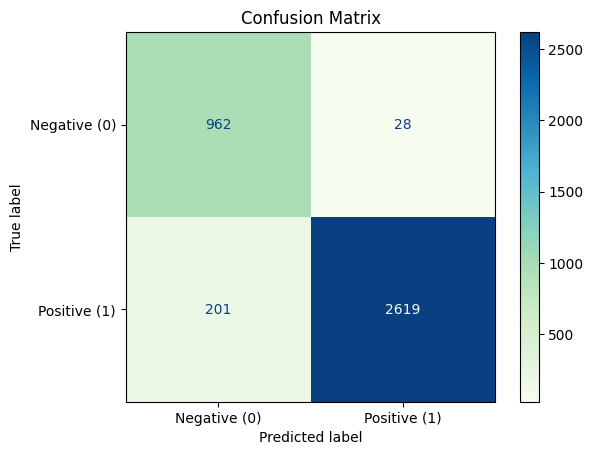

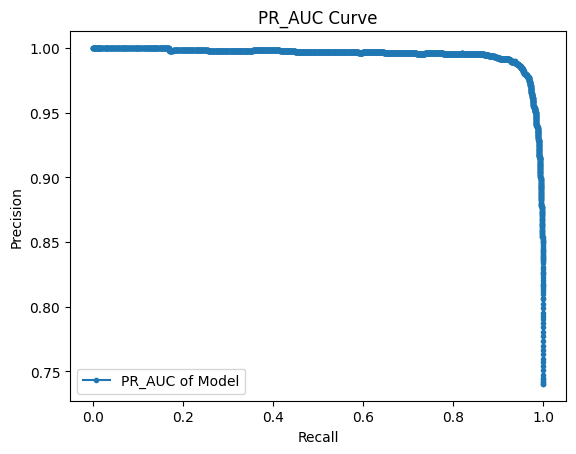

In [22]:
flair_pred_train = flair_predict(flair_train)
evaluate_model_test(flair_train['Sentiment'], flair_pred_train['flair_sentiment'] , flair_pred_train['flair_prob'])

TEST RESULTS
Classification Report
              precision    recall  f1-score   support

           0       0.80      0.97      0.88       424
           1       0.99      0.92      0.95      1210

    accuracy                           0.93      1634
   macro avg       0.90      0.94      0.91      1634
weighted avg       0.94      0.93      0.93      1634

PR_AUC score:  0.9960352417319926


<Figure size 640x480 with 0 Axes>

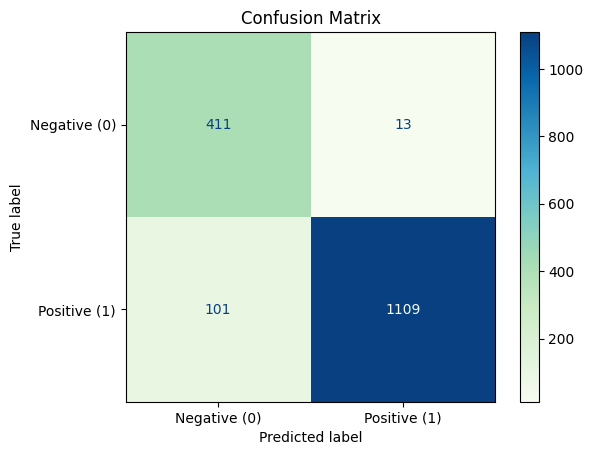

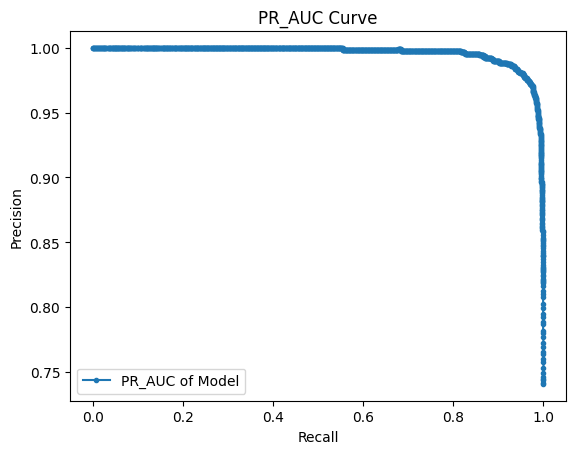

In [23]:
flair_pred = flair_predict(flair_test)
evaluate_model_test(features_df_test['Sentiment'], flair_pred['flair_sentiment'] , flair_pred['flair_prob'])

## Ensemble Flair and SVM (best performing model)

In [25]:
final_results = SA_MODEL_PREDICT(features_df_test.iloc[: , :-1],flair_test, mode = 'train')
final_results

,flair_sentiment,flair_prob,svm_sentiment,svm_prob,avg_prob,final_sentiment,Sentiment,Time,Text
0,1,0.999910,0,0.468194,0.734052,1,positive,17/4/21,I am a die hard soda pop fan. I will drink jui...
1,1,0.998684,1,0.996089,0.997386,1,positive,9/12/20,As i have stated before i love cheery flavor s...
2,1,0.998803,1,1.000000,0.999402,1,positive,8/9/20,These are very good. Nice and soft. Would for ...
3,0,0.000015,0,0.512117,0.256066,0,negative,10/7/21,this item is over priced. I but the 12oz pack...
4,0,0.000003,1,0.586996,0.293500,0,negative,20/11/19,"Although some may like this drink, it will not..."
...,...,...,...,...,...,...,...,...,...
1629,0,0.000053,0,0.079238,0.039645,0,negative,14/1/21,I opened the can and immediately became concer...
1630,1,0.999920,0,0.470976,0.735448,1,positive,14/1/21,So happy I got this on a subscription. I might...
1631,1,0.999833,1,0.958954,0.979394,1,positive,13/7/21,"Our family loves these chips, they are light, ..."
1632,1,0.999962,1,0.999997,0.999980,1,positive,15/6/21,We really like this peanut butter. The taste i...


TEST RESULTS
Classification Report
              precision    recall  f1-score   support

           0       0.84      0.96      0.90       424
           1       0.99      0.94      0.96      1210

    accuracy                           0.94      1634
   macro avg       0.91      0.95      0.93      1634
weighted avg       0.95      0.94      0.94      1634

PR_AUC score:  0.9924492768510054


<Figure size 640x480 with 0 Axes>

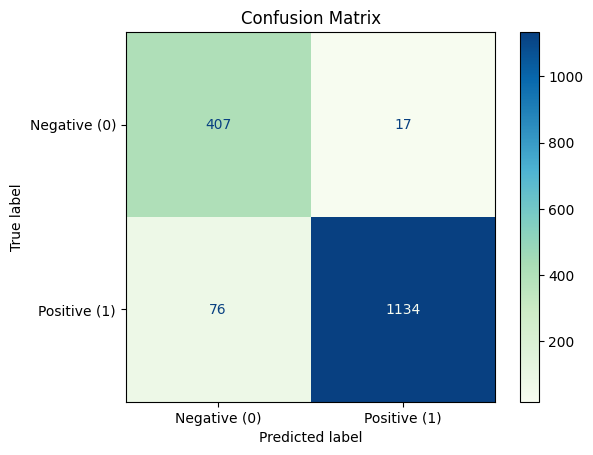

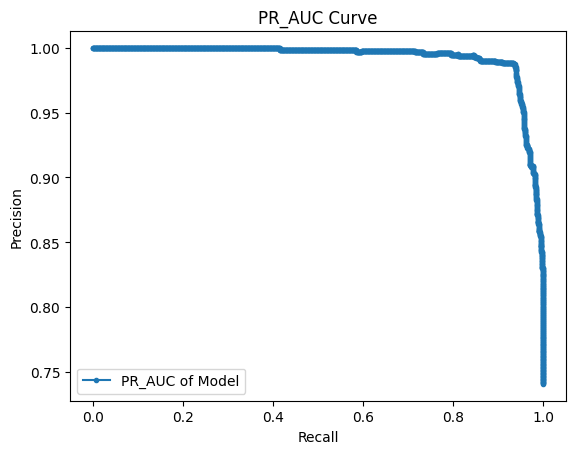

In [26]:
evaluate_model_test(features_df_test['Sentiment'], final_results['final_sentiment'] , final_results['avg_prob'])

## Train Final SVM Model on full dataset for future predictions on unseen data

In [7]:
features_df_train_full = final_full_data_preprocess(reviews_csv)
# To shuffle data
features_df_train_full  = features_df_train_full.sample(frac=1).reset_index(drop=True)
features_df_train_full

Shape after augmenting negative training samples:  (6858, 3)


,PC_tfidf1,PC_tfidf2,PC_tfidf3,PC_tfidf4,PC_tfidf5,PC_tfidf6,PC_tfidf7,PC_tfidf8,PC_tfidf9,PC_tfidf10,...,PC_tfidf2664,PC_tfidf2665,PC_tfidf2666,PC_emb1,PC_emb2,PC_emb3,PC_emb4,PC_emb5,PC_emb6,Sentiment
0,-0.055940,-0.047194,-0.008106,0.022777,0.067788,0.035626,-0.034394,-0.007978,0.091455,-0.017975,...,0.001012,0.005712,0.002973,-0.592359,0.203409,0.083597,0.044495,-0.203120,-0.116977,1
1,-0.048799,-0.023962,0.003008,0.009901,-0.000331,-0.060340,-0.035647,-0.001636,-0.063359,-0.045385,...,0.011650,-0.008401,-0.000594,-0.571055,-0.293871,-0.057662,-0.179833,-0.012753,0.140025,1
2,-0.047391,-0.045639,-0.009059,-0.054586,-0.032463,-0.054820,-0.017790,0.007067,-0.020037,-0.054360,...,0.000262,-0.005083,-0.013055,-0.031188,0.881454,-0.126713,0.004843,-0.428721,-0.214352,0
3,0.118965,-0.050680,-0.019237,-0.014621,0.065932,0.066068,-0.004007,0.031030,0.037805,-0.015120,...,0.005511,0.017202,-0.004054,0.980489,-0.598127,0.619199,-0.205803,0.040319,0.121815,1
4,-0.052172,-0.026542,0.000630,-0.024029,-0.089076,-0.009773,-0.070417,0.018684,-0.058172,0.012880,...,-0.003263,0.008646,0.011912,-0.634161,0.407540,0.004157,-0.192416,-0.170159,-0.018470,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6853,-0.052031,-0.000957,0.020458,0.108110,0.102384,-0.039175,0.086294,0.034613,-0.068439,-0.105333,...,0.002404,0.018824,0.006425,-0.714538,0.019824,-0.646848,0.039604,-0.227168,0.037787,1
6854,-0.034152,-0.044668,0.001942,0.060121,0.060968,0.017077,-0.004358,0.024487,0.068875,-0.105658,...,-0.004001,-0.005069,0.006014,-0.393314,0.126073,0.067523,-0.046924,0.146258,0.162233,1
6855,-0.033784,0.326328,0.556671,-0.148469,0.060211,0.070796,0.046819,0.002720,0.084988,0.014152,...,0.005828,-0.003091,0.003073,-1.351609,-0.915235,-0.191090,-0.295534,-0.074670,-0.041906,1
6856,-0.035421,-0.021772,0.011566,0.028229,-0.093343,0.003178,-0.007004,0.058604,0.029040,0.092748,...,0.004327,0.002324,0.007221,-0.639807,0.000245,0.116288,-0.253796,-0.005354,0.010125,0


In [8]:
# Final SVM model fit on full dataset
final_svm_full_model(features_df_train_full)

CROSS VALIDATION RESULTS
Average Cross Validation score accuracy :0.9002599664435952
Average Cross Validation score F1 :0.9154629095349381
Average Cross Validation score F1_weighted :0.9001647952147266
Average Cross Validation score pr_auc :0.9734479184570077


## Predictions on testing dataset

In [9]:
def scoring(test_df):
   # SA Preprocessing
    SA_PROCESSED_DF_SVM, SA_PROCESSED_DF_FLAIR = SA_PREPROCESS_TEST(test_df)
    # SA Predictions
    SA_PREDICTIONS_DF = SA_MODEL_PREDICT(SA_PROCESSED_DF_SVM, SA_PROCESSED_DF_FLAIR, "predict")
    sa_result_pred = SA_PRED.loc[:,["Time", "Text", "avg_prob", "Sentiment"]]
    sa_result_pred.rename(columns={"avg_prob":"predicted_sentiment_probability", "Sentiment":"predicted_sentiment"})

    return sa_result_pred


In [ ]:
input_file = "path_to_file"
test_df = pd.read_csv(input_file)
scoring_results=scoring(test_df)
scoring_results.to_csv("reviews_test_predictions_CAJN.csv", index = False)
